# Project 1
**Alexander Laloi Dybdahl, Viktor Ellevseth**

In [1]:
# %load_ext autoreload
# %autoreload 2
import numpy as np

from helpers import *
from plots import *
from cross_validation import *
from build_polynomial import *
from validation import *
from preproccessing import *
from implementations import *

from gradient_descent import *
from stochastic_gradient_descent import *
from least_squares import *
from ridge_regression import *
from logistic_regression import *

#### Load data

In [3]:
x_train, x_test, y_train, train_ids, test_ids = load_csv_data("data/", sub_sample=False)

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(328135, 321)
(328135,)
(109379, 321)


## Run

In [5]:
# Define constants
names = ["Least Squares", "Gradient Descent", "Stochastic Gradient Descent", "Ridge Regression", "Logistic Regression", "Regularized Logistic Regression"]
max_iters = 1000
seed = 123

# Define hyperparameters
gamma = 0.1
lambda_ridge = 0.01
lambda_logistic = 0.001

# Preprocess data
tx_train, tx_validate, tx_test, y, y_validate = preprocess_data(
                                       x_train[:, 9:],
                                       x_test[:, 9:],
                                       y_train,
                                       min_unique = 7,
                                       var_tol = 0.0001,
                                       corr_tol = 0.999,
                                       empty_tol = 0.90,
                                       num_components = 300,
                                       validation_size = 0.10,
                                       ratio = 0.10,
                                       seed = 1,
                                       pca = False,
                                       hon = True
)

# Define initial w
np.random.seed(seed)
initial_w = np.random.random(tx_train.shape[1])

print(tx_train.shape, tx_test.shape, tx_validate.shape)

encoding (328135, 930) (109379, 930)
imputing (328135, 930) (109379, 930)
removing low var (328135, 756) (109379, 756)
removing high corr (328135, 673) (109379, 673)
standardize (328135, 673) (109379, 673)
splitting (295322, 673) (109379, 673) (32813, 673)
balancing (469656, 673) (109379, 673) (32813, 673)
(469656, 673) (109379, 673) (32813, 673)


In [6]:
print(len(y[y == 1])/len(y))

0.5


## Train 

In [7]:
mses = []
ws = []

In [8]:
w_ls, mse_ls = least_squares(y, tx_train)
print(mse_ls)
mses.append(mse_ls)
ws.append(w_ls)

0.07527283836181264


In [9]:
w_gd, mse_gd = mean_squared_error_gd(y, tx_train, w_ls, max_iters=max_iters, gamma=gamma)
print(mse_gd)
mses.append(mse_gd)
ws.append(w_gd)

Current iteration=0, loss=0.07527283836181155
Gradient close to zero
0.07527283836181155


In [10]:
w_sgd, mse_sgd = mean_squared_error_sgd(y, tx_train, w_ls, max_iters=max_iters, gamma=gamma, batch_size=y.shape[0])
print(mse_sgd)
mses.append(mse_sgd)
ws.append(w_sgd)

Current iteration=0, loss=0.07527283836181155
Gradient close to zero
0.07527283836181155


In [11]:
w_rr, mse_rr = ridge_regression(y, tx_train, lambda_ridge)
print(mse_rr)
mses.append(mse_rr)
ws.append(w_rr)

0.1201103641931973


In [12]:
np.random.seed(seed)
initial_w = np.zeros(tx_train.shape[1])

w_lr, mse_lr = logistic_regression(y, tx_train, initial_w, max_iters=1000, gamma=0.1, seed=seed)
print(mse_lr)
mses.append(mse_lr)
ws.append(w_lr)

Current iteration=0, loss=0.569667517301423
Current iteration=100, loss=0.5105792074730766
Current iteration=200, loss=0.5089309845437658
Current iteration=300, loss=0.5080425889588882
Current iteration=400, loss=0.5074158513955448
Current iteration=500, loss=0.5069105353633221
Current iteration=600, loss=0.5064685582265697
Current iteration=700, loss=0.5060624680551444
Current iteration=800, loss=0.5056783354036296
Current iteration=900, loss=0.5053087168846153
Reached max iterations
0.0825667720200664


In [13]:
w_rlr, mse_rlr = reg_logistic_regression(y, tx_train, lambda_logistic, w_lr, max_iters=1000, gamma=0.1, seed=seed)
print(mse_rlr)
mses.append(mse_rlr)
ws.append(w_rlr)

Current iteration=0, loss=0.504950407838644
Current iteration=100, loss=0.5047087921490573
Current iteration=200, loss=0.5045107168581737
Current iteration=300, loss=0.5084693480405958
Current iteration=400, loss=0.5056765089638942
Current iteration=500, loss=0.5026873413636642
Current iteration=600, loss=0.4998806584760767
Current iteration=700, loss=0.4972825293837387
Current iteration=800, loss=0.4948883629497133
Current iteration=900, loss=0.4926879022531032
Reached max iterations
0.07809784820116518


In [14]:
print_mse(names, mses)

Method                                    MSE Value      
---------------------------------------------------------
Least Squares                            0.0752728384
Gradient Descent                         0.0752728384
Stochastic Gradient Descent              0.0752728384
Ridge Regression                         0.1201103642
Logistic Regression                      0.0825667720
Regularized Logistic Regression          0.0780978482


## Test methods

### Testing on validation set

In [15]:
# Cutoff values for regression and classification methods
cutoffs = np.linspace(0.10, 0.99, 51)
cutoff_ls, f1_scores_ls = cross_validation_cutoffs(y_validate, tx_validate, w_ls, predict_class, cutoffs, plot=False) # 0.66
cutoff_rr, f1_scores_rr = cross_validation_cutoffs(y_validate, tx_validate, w_rr, predict_class, cutoffs, plot=False) # 0.62
cutoff_lr, f1_scores_lr = cross_validation_cutoffs(y_validate, tx_validate, w_lr, predict_class, cutoffs, plot=False) # 0.81
cutoff_rlr, f1_scores_rlr = cross_validation_cutoffs(y_validate, tx_validate, w_rlr, predict_class, cutoffs, plot=False) # 0.69

In [16]:
print("cutoffs", cutoff_ls, cutoff_rr, cutoff_lr, cutoff_rlr)

# Predict for regression methods
pred_ls = predict_reg(tx_validate, w_ls, cutoff_ls)
pred_gd = predict_reg(tx_validate, w_gd, cutoff_ls)
pred_sgd = predict_reg(tx_validate, w_sgd, cutoff_ls)
pred_rr = predict_reg(tx_validate, w_rr, cutoff_rr)

# Predict for classification methods
pred_lr = predict_class(tx_validate, w_lr, cutoff_lr)
pred_rlr = predict_class(tx_validate, w_rlr, cutoff_rlr)

predictions = [pred_ls, pred_gd, pred_sgd, pred_rr, pred_lr, pred_rlr]

plot_results(y_validate, predictions, names)

cutoffs 0.6696 0.6162 0.7942 0.723
Method                                                     Accuracy   F1 Score   Type II Error  
------------------------------------------------------------------------------------------------
Least Squares                                                0.872      0.428      0.454
Gradient Descent                                             0.872      0.428      0.454
Stochastic Gradient Descent                                  0.872      0.428      0.454
Ridge Regression                                             0.904      0.412      0.617
Logistic Regression                                          0.871      0.432      0.442
Regularized Logistic Regression                              0.844      0.419      0.357


In [17]:
for name, pred in zip(names, predictions):
    print(name)
    print(confusion_matrix(y_validate, pred))
    print()

Least Squares
[[ 1573  2888]
 [ 1310 27042]]

Gradient Descent
[[ 1573  2888]
 [ 1310 27042]]

Stochastic Gradient Descent
[[ 1573  2888]
 [ 1310 27042]]

Ridge Regression
[[ 1105  1381]
 [ 1778 28549]]

Logistic Regression
[[ 1608  2951]
 [ 1275 26979]]

Regularized Logistic Regression
[[ 1853  4104]
 [ 1030 25826]]



In [18]:
# Calculate classification
pred = np.where(tx_test @ w_ls > cutoff_ls, 1, -1)
print(len(pred[pred == 1])/len(pred))
create_csv_submission(test_ids, pred, "data/sample_submission_ls.csv")

# Calculate classification
pred = np.where(tx_test @ w_rr > cutoff_rr, 1, -1)
print(len(pred[pred == 1])/len(pred))
create_csv_submission(test_ids, pred, "data/sample_submission_ridge.csv")

# Calculate classification
pred = np.where(sigmoid(tx_test @ w_lr) > cutoff_lr, 1, -1)
print(len(pred[pred == 1])/len(pred))
create_csv_submission(test_ids, pred, "data/sample_submission_lr.csv")

# Calculate classification
pred = np.where(sigmoid(tx_test @ w_rlr) > cutoff_rlr, 1, -1)
print(len(pred[pred == 1])/len(pred))
create_csv_submission(test_ids, pred, "data/sample_submission_rlr.csv")

0.46143226761992706
0.07563609102295688
0.13908519916985893
0.1822104791596193


## Cross Validation on lambda and cutoffs on Ridge Regression

lambda 0.0001
lambda 0.00013738237958832623
lambda 0.00018873918221350977
lambda 0.0002592943797404667
lambda 0.0003562247890262444
lambda 0.0004893900918477494
lambda 0.0006723357536499335
lambda 0.0009236708571873865
lambda 0.0012689610031679222
lambda 0.0017433288221999873
lambda 0.002395026619987486
lambda 0.0032903445623126675
lambda 0.004520353656360241
lambda 0.006210169418915616
lambda 0.008531678524172805
lambda 0.011721022975334805
lambda 0.01610262027560939
lambda 0.02212216291070448
lambda 0.03039195382313198
lambda 0.041753189365604
lambda 0.05736152510448681
lambda 0.07880462815669913
lambda 0.1082636733874054
lambda 0.14873521072935117
lambda 0.20433597178569418
lambda 0.2807216203941176
lambda 0.38566204211634725
lambda 0.5298316906283708
lambda 0.7278953843983146
lambda 1.0
Best lambda: 0.0001
Best rmse: 0.49037118398042406


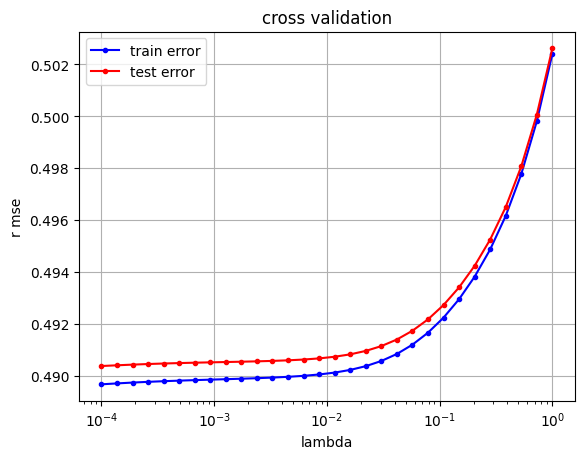

In [19]:
lambdas = np.logspace(-4, 0, 30)
k_fold = 7

best_lambda_ridge, best_rmse = cross_validation_lambda(y, tx_train, ridge_regression, k_fold, lambdas, seed=seed, args=())
print("Best lambda:", best_lambda_ridge)
print("Best rmse:", best_rmse)

In [20]:
cutoffs_rr_CV = np.linspace(0.1, 0.9, 50)
best_cutoff_rr, f1_scores_rr_CV = cross_validation_cutoffs(y_validate, tx_validate, w_rr, predict_class, cutoffs_rr_CV, plot=False)
print(best_cutoff_rr)

0.6224489795918368


In [21]:
w_rr_CV, mse_rr_CV = ridge_regression(y, tx_train, best_lambda_ridge)
print(mse_rr_CV)

pred_rr_poly = predict_reg(tx_validate, w_rr_CV, best_cutoff_rr)
predictions.append(pred_rr_poly)
names.append("Ridge Regression CV ")
plot_results(y_validate, predictions, names)

0.11991064737851931
Method                                                     Accuracy   F1 Score   Type II Error  
------------------------------------------------------------------------------------------------
Least Squares                                                0.872      0.428      0.454
Gradient Descent                                             0.872      0.428      0.454
Stochastic Gradient Descent                                  0.872      0.428      0.454
Ridge Regression                                             0.904      0.412      0.617
Logistic Regression                                          0.871      0.432      0.442
Regularized Logistic Regression                              0.844      0.419      0.357
Ridge Regression CV                                          0.904      0.410      0.621


In [22]:
# Calculate classification
pred = np.where(tx_test @ w_rr_CV > cutoff_rr, 1, -1)
print(len(pred[pred == 1])/len(pred))

# Write classifications to file
create_csv_submission(test_ids, pred, "data/sample_submission_ridge_CV.csv")

0.07731831521590067


## Cross Validation on lambda and cutoffs on RLR

In [ ]:
lambdas = [0.001, 0.005, 0.01, 0.05, 0.1]
k_fold = 5

best_lambda_rlr, best_rmse = cross_validation_lambda(y, tx_train, reg_logistic_regression, k_fold, lambdas, seed=seed, loss_type="class", args=(w_lr, ))
print("Best lambda:", best_lambda_rlr)
print("Best rmse:", best_rmse)

lambda 0.001
Current iteration=0, loss=0.5052608690303392
Current iteration=100, loss=0.5049067697310289
Current iteration=200, loss=0.5047048292970516
Current iteration=300, loss=0.508716036101004
Current iteration=400, loss=0.506003500689529
Current iteration=500, loss=0.5030397929974786
Current iteration=600, loss=0.5002512248749802
Current iteration=700, loss=0.4976706035621228
Current iteration=800, loss=0.4952941541184938
Current iteration=900, loss=0.49311137389674
Reached max iterations
Current iteration=0, loss=0.5047707382949043
Current iteration=100, loss=0.504400548518907
Current iteration=200, loss=0.5041851942737409
Current iteration=300, loss=0.5081412449944999
Current iteration=400, loss=0.5053483639469795
Current iteration=500, loss=0.5023486067162282
Current iteration=600, loss=0.4995294149802188
Current iteration=700, loss=0.4969144699690419
Current iteration=800, loss=0.4944989090912836
Current iteration=900, loss=0.4922726806101309
Reached max iterations
Current it

In [ ]:
cutoffs_rlr_CV = np.linspace(0.1, 0.99, 55)
best_cutoff_rlr, f1_scores_rlr_CV = cross_validation_cutoffs(y_validate, tx_validate, w_rlr, predict_class, cutoffs_rlr_CV, plot=False)
print(best_cutoff_rlr)

0.7262962962962963


In [ ]:
w_rlr_CV, mse_rlr_CV = reg_logistic_regression(y, tx_train, 0.1, w_rlr)
print(mse_rlr_CV)

pred_rlr_poly = predict_reg(tx_validate, w_rlr_CV, best_cutoff_rlr)
predictions.append(pred_rlr_poly)
names.append("Regularized Logistic Regression CV ")
plot_results(y_validate, predictions, names)

Current iteration=0, loss=0.5246587466120257
Current iteration=100, loss=0.5150223383963726
Current iteration=200, loss=0.5182493398212649
Current iteration=300, loss=0.5180214132994074
Current iteration=400, loss=0.519589109087956
Gradient close to zero
0.0856070690838997
Method                                                     Accuracy   F1 Score   Type II Error  
------------------------------------------------------------------------------------------------
Least Squares                                                0.493      0.160      0.451
Gradient Descent                                             0.493      0.160      0.451
Stochastic Gradient Descent                                  0.493      0.160      0.451
Ridge Regression                                             0.902      0.393      0.637
Logistic Regression                                          0.862      0.412      0.447
Regularized Logistic Regression                              0.832      0.406      0.34

In [ ]:

# Calculate classification
pred = np.where(sigmoid(tx_test @ w_rlr) > cutoff_rlr, 1, -1)
print(len(pred[pred == 1])/len(pred))

# Write classifications to file
create_csv_submission(test_ids, pred, "data/sample_submission_rlr.csv")

0.21622066393000486


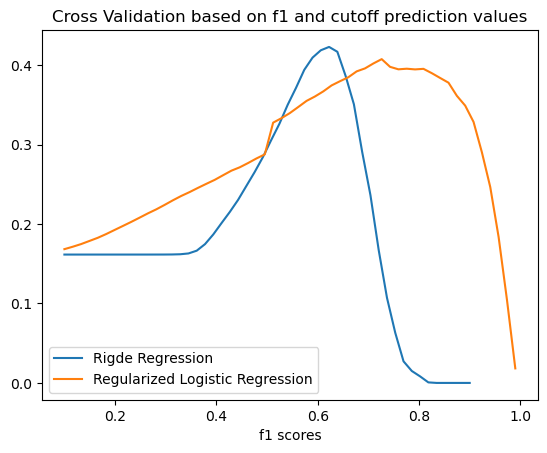

In [ ]:
plt.plot(cutoffs_rr_CV, f1_scores_rr_CV, label="Rigde Regression")
plt.plot(cutoffs_rlr_CV, f1_scores_rlr_CV, label="Regularized Logistic Regression")
plt.legend()
plt.title("Cross Validation based on f1 and cutoff prediction values")
plt.xlabel("cutoffs")
plt.xlabel("f1 scores")
plt.savefig("cross_validation_rr_and_rlr")

## Polynomial regression

In [ ]:
degree = 2
tx_poly = build_poly_multivariate(tx_train, degree)
tx_validate_poly = build_poly_multivariate(tx_validate, degree)
tx_test_poly = build_poly_multivariate(tx_test, degree)

np.random.seed(seed)
initial_w = np.random.random(tx_poly.shape[1])

In [ ]:
w_ls_poly, mse_ls_poly = least_squares(y, tx_poly)
print(mse_ls_poly)

pred_rr_poly = predict_reg(tx_validate_poly, w_ls_poly)
predictions.append(pred_rr_poly)
names.append("Least Squares Poly " + str(degree))
plot_results(y_validate, predictions, names)

0.07692537592223618
Method                                                     Accuracy   F1 Score   Type II Error  
------------------------------------------------------------------------------------------------
Least Squares                                                0.493      0.160      0.451
Gradient Descent                                             0.493      0.160      0.451
Stochastic Gradient Descent                                  0.493      0.160      0.451
Ridge Regression                                             0.902      0.393      0.637
Logistic Regression                                          0.862      0.412      0.447
Regularized Logistic Regression                              0.832      0.406      0.348
Ridge Regression CV                                          0.902      0.392      0.642
Least Squares Poly 2                                         0.536      0.181      0.418


In [ ]:
w_rr_poly, mse_rr_poly = ridge_regression(y, tx_poly, best_lambda_ridge)
print(mse_rr_poly)

pred_rr_poly = predict_reg(tx_validate_poly, w_rr_poly)
predictions.append(pred_rr_poly)
names.append("Ridge Regression Poly " + str(degree))
plot_results(y_validate, predictions, names)

0.07693354893762133
Method                                                     Accuracy   F1 Score   Type II Error  
------------------------------------------------------------------------------------------------
Least Squares                                                0.493      0.160      0.451
Gradient Descent                                             0.493      0.160      0.451
Stochastic Gradient Descent                                  0.493      0.160      0.451
Ridge Regression                                             0.902      0.393      0.637
Logistic Regression                                          0.862      0.412      0.447
Regularized Logistic Regression                              0.832      0.406      0.348
Ridge Regression CV                                          0.902      0.392      0.642
Least Squares Poly 2                                         0.536      0.181      0.418
Ridge Regression Poly 2                                      0.763      0.

In [ ]:
w_rlr_poly, mse_rlr_poly = reg_logistic_regression(y, tx_poly, lambda_logistic, initial_w, max_iters, gamma=gamma)
print(mse_rlr_poly)

pred_rlr_poly = predict_class(tx_validate_poly, w_rlr_poly)
predictions.append(pred_rlr_poly)
names.append("Regularized Logistic Regression Poly " + str(degree) + " Lambda " + str(lambda_logistic))
plot_results(y_validate, predictions, names)

Current iteration=0, loss=0.8143905987955656
Current iteration=100, loss=0.9674856780836784
Current iteration=200, loss=0.8160487672063753
Current iteration=300, loss=0.7557373377709026
Current iteration=400, loss=0.7182980269712284
Current iteration=500, loss=0.7123115860769277
Current iteration=600, loss=0.6930781877706963
Current iteration=700, loss=0.6897779720113523
Current iteration=800, loss=0.6858182679596985
Current iteration=900, loss=0.6821037901102738
Reached max iterations
0.11276225985522575
Method                                                     Accuracy   F1 Score   Type II Error  
------------------------------------------------------------------------------------------------
Least Squares                                                0.493      0.160      0.451
Gradient Descent                                             0.493      0.160      0.451
Stochastic Gradient Descent                                  0.493      0.160      0.451
Ridge Regression            